In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
phish_set = pd.read_csv('http://data.phishtank.com/data/online-valid.csv')
#source https://www.phishtank.com/developer_info.php

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
phish_set.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,4908593,http://unlockpavpal.heliahonar.com/signin.php?...,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T21:09:58+00:00,yes,2017-03-28T21:12:04+00:00,yes,Internal Revenue Service
1,4908590,http://pptaxunlock.com,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T21:08:44+00:00,yes,2017-03-28T21:09:55+00:00,yes,Internal Revenue Service
2,4908584,https://paypal.com.account-information.service...,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T20:57:10+00:00,yes,2017-03-28T22:08:36+00:00,yes,PayPal
3,4908504,http://bluearrowconstruction.org/m/auth/9b4461...,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T20:20:06+00:00,yes,2017-03-28T22:50:01+00:00,yes,ASB Bank Limited
4,4908458,http://ibc-hoffman.com/m/auth/,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T20:10:58+00:00,yes,2017-03-28T22:51:06+00:00,yes,ASB Bank Limited


In [4]:
phish_set.describe()

,phish_id
count,28154.00
mean,4304412.74
std,595439.25
min,111532.00
25%,4032362.50
50%,4491977.50
75%,4730064.75
max,4908593.00


In [5]:
phish_set_indexed = phish_set.set_index(['target'])

In [6]:
phish_set_streamlined = phish_set_indexed.drop(['phish_id', 'url', 'phish_detail_url', 'submission_time', 
                                                'verification_time'], axis=1)

In [7]:
phish_set_streamlined.head()

,verified,online
target,,
Internal Revenue Service,yes,yes
Internal Revenue Service,yes,yes
PayPal,yes,yes
ASB Bank Limited,yes,yes
ASB Bank Limited,yes,yes


In [8]:
phish_set_streamlined.count()

verified    28154
online      28154
dtype: int64

In [9]:
phish_set_grouped = phish_set.groupby(['target'])

In [10]:
phish_set_grouped_size = phish_set_grouped.size()

In [11]:
phish_set_grouped_size.loc['PayPal']

1121

In [12]:
phish_set_grouped_size.head()

target
ABN AMRO Bank         1
ABSA Bank             2
AOL                 187
ASB Bank Limited     19
AT&amp;T              1
dtype: int64

In [13]:
%matplotlib inline

In [14]:
phish_set_grouped_size.describe()

count      88.00
mean      319.93
std      2674.00
min         1.00
25%         2.00
50%         6.00
75%        24.25
max     25092.00
dtype: float64

In [15]:
phish_set_final = phish_set.drop(['phish_id', 'url', 'phish_detail_url', 'submission_time', 'verification_time', 'online'], axis=1)

In [16]:
phish_set_finalized = phish_set_final.groupby(['target']).count()

In [17]:
phish_set_use = phish_set_finalized[phish_set_finalized['verified'] >= 20].drop('Other')
phish_set_use = phish_set_use.rename(columns={'verified':'breaches'})

In [18]:
phish_set_use

,breaches
target,
AOL,187
Adobe,37
Amazon.com,26
Apple,66
Banco De Brasil,28
Bank of America Corporation,32
Bradesco,24
Dropbox,125
Facebook,288


In [19]:
phish_set_use.count()

breaches    22
dtype: int64

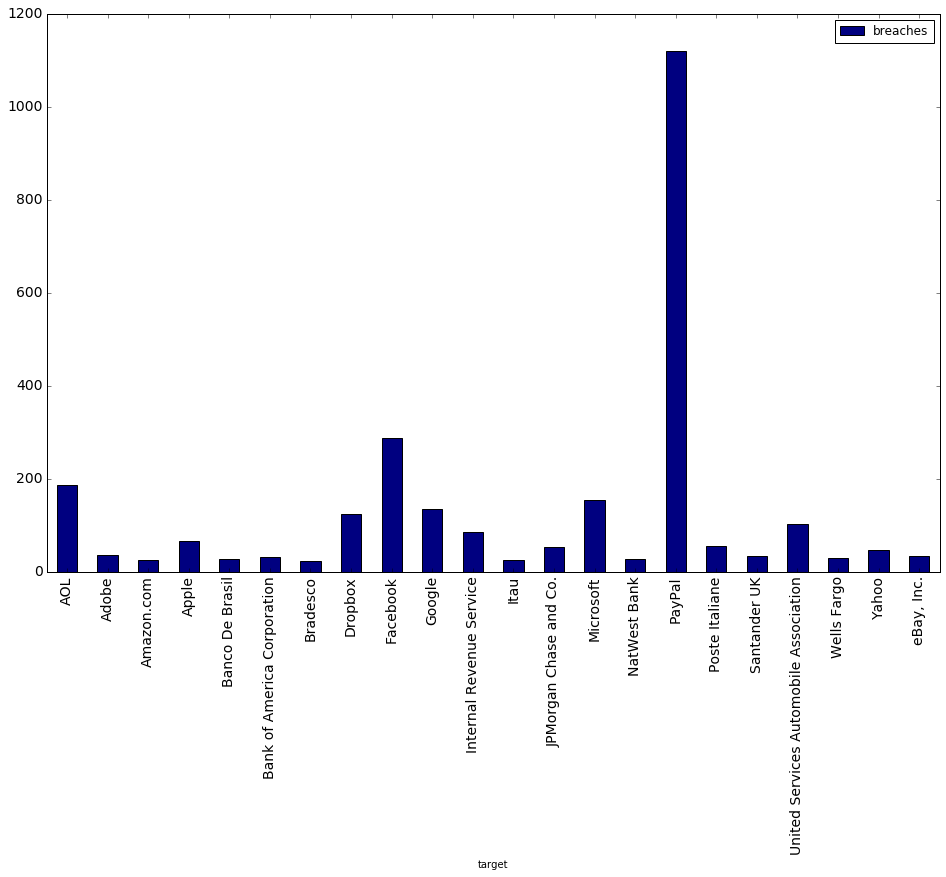

In [20]:
phish_set_use.plot(kind='bar', figsize=(16,10), legend=True, color=['navy'], fontsize=14)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c4826a0>], dtype=object)

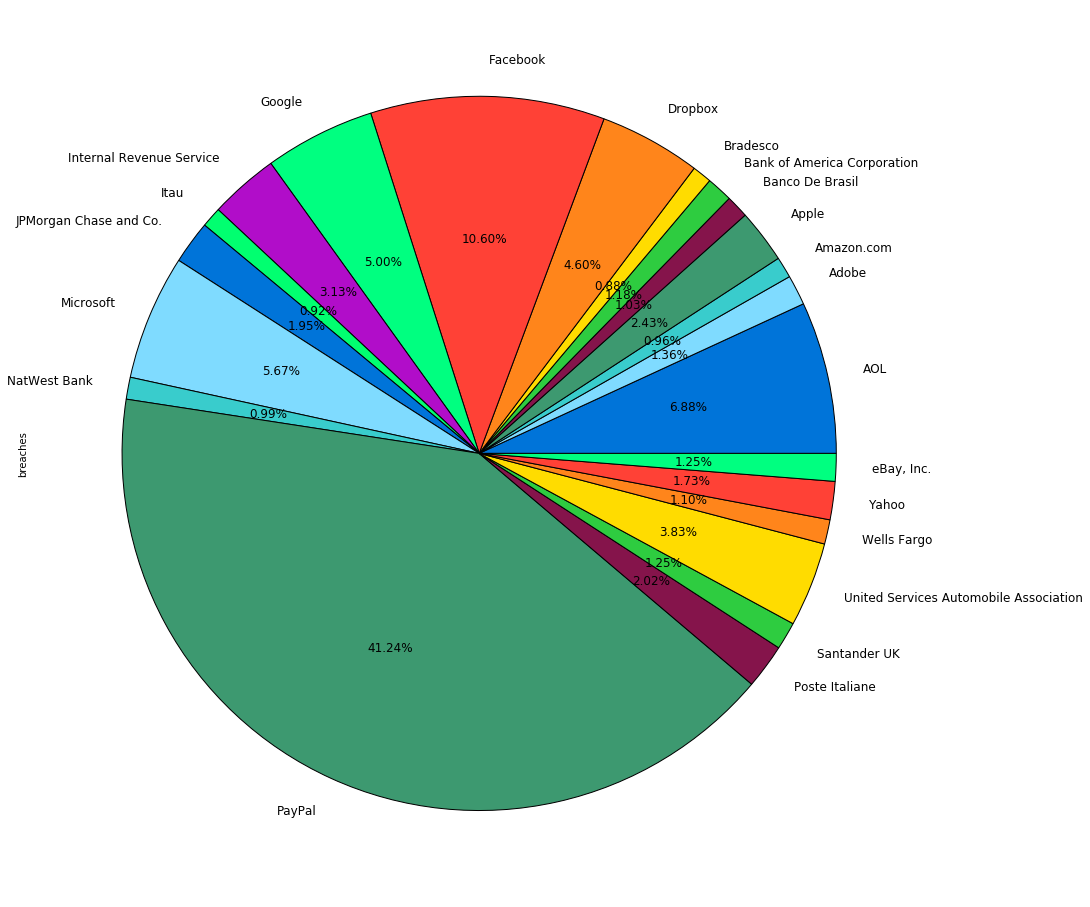

In [21]:
#explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
colors = ['#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#85144B','#2ECC40', 
          '#FFDC00', '#FF851B', '#FF4136', '#00FF80', '#B10DC9','#01FF70']
phish_set_use.plot.pie(subplots=True, figsize=(16,16), legend=False, autopct='%0.2f%%', colors=colors,
                       fontsize=12) #, explode=explode)

In [22]:
phish_set.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,4908593,http://unlockpavpal.heliahonar.com/signin.php?...,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T21:09:58+00:00,yes,2017-03-28T21:12:04+00:00,yes,Internal Revenue Service
1,4908590,http://pptaxunlock.com,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T21:08:44+00:00,yes,2017-03-28T21:09:55+00:00,yes,Internal Revenue Service
2,4908584,https://paypal.com.account-information.service...,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T20:57:10+00:00,yes,2017-03-28T22:08:36+00:00,yes,PayPal
3,4908504,http://bluearrowconstruction.org/m/auth/9b4461...,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T20:20:06+00:00,yes,2017-03-28T22:50:01+00:00,yes,ASB Bank Limited
4,4908458,http://ibc-hoffman.com/m/auth/,http://www.phishtank.com/phish_detail.php?phis...,2017-03-28T20:10:58+00:00,yes,2017-03-28T22:51:06+00:00,yes,ASB Bank Limited


In [23]:
phish_set_by_year = phish_set.drop(['url', 'phish_detail_url', 'verified', 'verification_time', 'online'], axis=1)

In [24]:
phish_set_by_year.head()

,phish_id,submission_time,target
0,4908593,2017-03-28T21:09:58+00:00,Internal Revenue Service
1,4908590,2017-03-28T21:08:44+00:00,Internal Revenue Service
2,4908584,2017-03-28T20:57:10+00:00,PayPal
3,4908504,2017-03-28T20:20:06+00:00,ASB Bank Limited
4,4908458,2017-03-28T20:10:58+00:00,ASB Bank Limited


In [25]:
phish_set_by_year = phish_set_by_year.set_index(['target'])

In [26]:
phish_set_by_year.head()

,phish_id,submission_time
target,,
Internal Revenue Service,4908593,2017-03-28T21:09:58+00:00
Internal Revenue Service,4908590,2017-03-28T21:08:44+00:00
PayPal,4908584,2017-03-28T20:57:10+00:00
ASB Bank Limited,4908504,2017-03-28T20:20:06+00:00
ASB Bank Limited,4908458,2017-03-28T20:10:58+00:00


In [27]:
phish_set_by_year['submission_time'].dtype

dtype('O')

In [28]:
phish_set_by_year['year'] = phish_set_by_year['submission_time'].astype('datetime64[ns]').dt.year

In [29]:
phish_set_by_year.head()

,phish_id,submission_time,year
target,,,
Internal Revenue Service,4908593,2017-03-28T21:09:58+00:00,2017
Internal Revenue Service,4908590,2017-03-28T21:08:44+00:00,2017
PayPal,4908584,2017-03-28T20:57:10+00:00,2017
ASB Bank Limited,4908504,2017-03-28T20:20:06+00:00,2017
ASB Bank Limited,4908458,2017-03-28T20:10:58+00:00,2017


In [30]:
phish_set_by_year['year'].dtype

dtype('int64')

In [31]:
phish_set_by_year_group = phish_set_by_year.groupby(['year']).count().drop(['submission_time'], axis=1).rename(columns={'phish_id':'annual breaches'})

In [32]:
phish_set_by_year_group

,annual breaches
year,
2007,22
2008,4
2009,2
2010,3
2011,5
2012,98
2013,254
2014,461
2015,3031


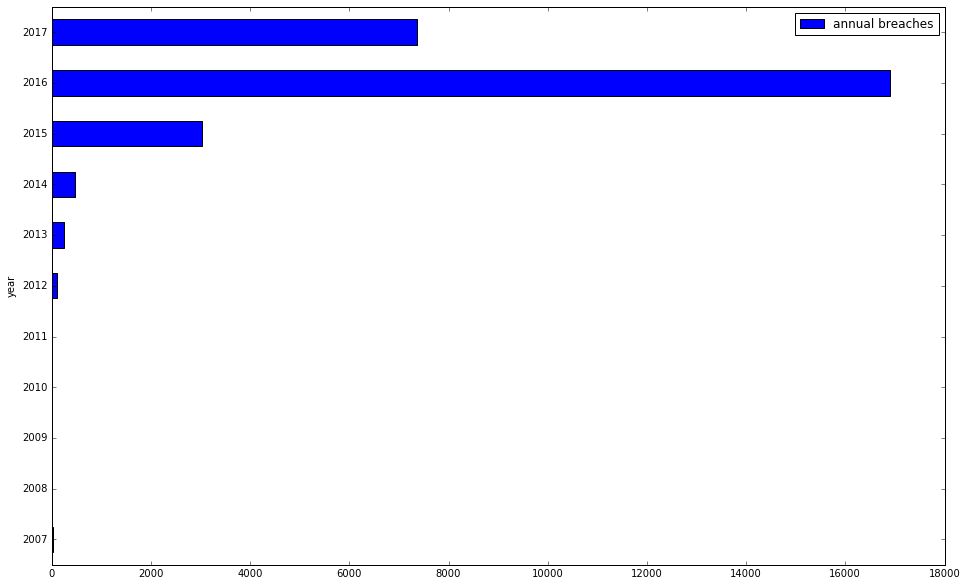

In [33]:
phish_set_by_year_group.plot(kind='barh', legend=True, figsize=(16, 10))

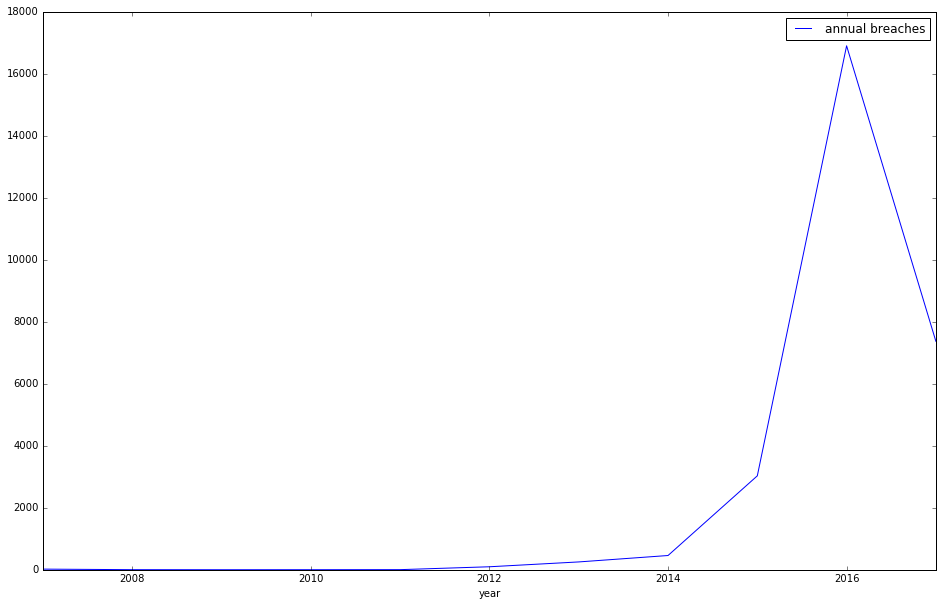

In [34]:
phish_set_by_year_group.plot(kind='line', legend=True, figsize=(16, 10))

In [35]:
phish_set_by_month = phish_set.drop(['url', 'phish_detail_url', 'verified', 'verification_time', 'online'], axis=1)

In [36]:
phish_set_by_month = phish_set_by_month.set_index(['target'])

In [37]:
phish_set_by_month.head()

,phish_id,submission_time
target,,
Internal Revenue Service,4908593,2017-03-28T21:09:58+00:00
Internal Revenue Service,4908590,2017-03-28T21:08:44+00:00
PayPal,4908584,2017-03-28T20:57:10+00:00
ASB Bank Limited,4908504,2017-03-28T20:20:06+00:00
ASB Bank Limited,4908458,2017-03-28T20:10:58+00:00


In [38]:
phish_set_by_month['submission_time'].dtype

dtype('O')

In [39]:
phish_set_by_month['month'] = phish_set_by_month['submission_time'].astype('datetime64[ns]').dt.month

In [40]:
phish_set_by_month.head()

,phish_id,submission_time,month
target,,,
Internal Revenue Service,4908593,2017-03-28T21:09:58+00:00,3
Internal Revenue Service,4908590,2017-03-28T21:08:44+00:00,3
PayPal,4908584,2017-03-28T20:57:10+00:00,3
ASB Bank Limited,4908504,2017-03-28T20:20:06+00:00,3
ASB Bank Limited,4908458,2017-03-28T20:10:58+00:00,3


In [41]:
phish_set_by_month_group = phish_set_by_month.groupby(['month']).count().drop(['submission_time'], axis=1).rename(columns={'phish_id':'monthly breaches'})

In [42]:
phish_set_by_month_group

,monthly breaches
month,
1,2427
2,2751
3,4346
4,1553
5,1807
6,1826
7,1255
8,1879
9,2267


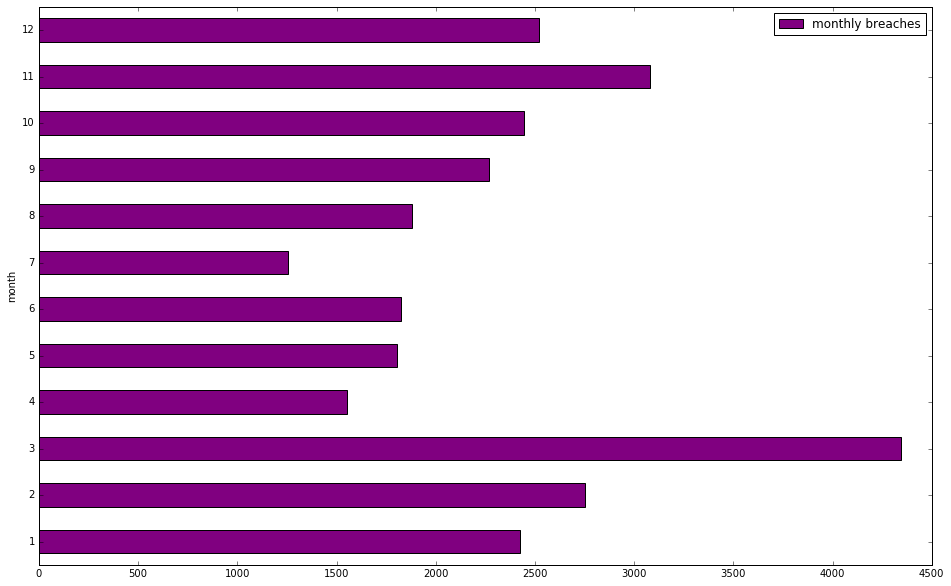

In [43]:
phish_set_by_month_group.plot(kind='barh', legend=True, figsize=(16, 10), color='purple')